In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Import the imputer

In [5]:
file='../기업프로젝트/output.csv'
df=pd.read_csv(file)
df

,Unnamed: 0.1,Unnamed: 0,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,...,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,요약
0,0,1,1.100611e+06,20230115,서울신문,홍지민,"하윤기, 덩크 9방에 생애 첫 올스타전 MVP",스포츠>축구,스포츠>농구_배구,스포츠>올림픽_아시안게임,...,NaN,NaN,"울산,전주,서울,준결승전,경기,영광,창원,아반도,필리핀,아시아,안양,대구,문성곤","한국가스공사,KGC,SK,kt,KCC,랜드리,LG,렌즈 아반도,아셈,삼성,현대모비스...","하윤기,덩크,생애,올스타전,MVP,이대성,제압,허웅,전성현,3점,분전,허웅,생애,3...","허웅,덩크,올스타전,3점,하윤기,이대성,kt,전성현,외국인,팬투표,덩크슛,9개,서울...",팀 이대성 122 117로 팀 허웅 제압 전성현 3점슛 9개 분전허웅 생애 첫 ...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,팀 이대성 122 117로 팀 허 웅 제압 전 성현 3점 슛 9개 분전 허 웅 생애...
1,1,3,1.100611e+06,20230115,서울신문,신진호,"장제원, 나경원 향해 “제2의 유승민 되지 말기를”",정치>국회_정당,정치>선거,정치>청와대,...,NaN,"유승민,김기현,나경원,장제원,전,유일한,장,조원진,윤석열,유 전,마키아벨리","을,동구,파동,대구","친박,정부,친박계,파동,대한민국,진박감별사,새누리당,페이스북,국민의힘","장제원,나경원,제2,유승민,제2,진박감별사,나경원,비판,응수,나경원,국민,의원,출마...","감별사,새누리당,유승민,박근혜,나경원,마키아벨리,친박,진박,진박감별사,페이스북,장제...",제2의 진박감별사가 당 쥐락펴락 나경원 비판에 응수 국민의힘 장제원 의원 나...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,제 2의 진 박 감별사가 당 쥐락펴락 나 경원 비판에 응수 국민의 힘 장 제원 의원...
2,2,5,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 북구갑 양금희 당직 맡아 국회평가 높아,정치>국회_정당,NaN,NaN,...,NaN,"양금희,윤석열,홍준표","대구,대구시,대야,부여,북구,북구갑,선봉","국민의힘,국회,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","북구갑,양금희,당직,국회평가,59%,북구갑,주민,59%,대통령,국정,수행,긍정,시장...","북구갑,대구,양금희,응답자,ars,한길리서치,홈페이지,행정안전부,18세,여론조사,부...",양금희 국민의힘 의원 대구 북구갑 . 대구...,https://news.imaeil.com/page/view/202301152129...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 북구 갑에 거주하는 만 18세 이상...
3,3,7,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 서구 김상훈 3선 의정활동 평가 무난,지역>대구,지역>대전,정치>국회_정당,...,NaN,"김,김상훈,윤석열,홍준표","대구,대구시,부여,서구","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","서구,김상훈,3선,무난,의정,활동,평가,대통령,국정수행,62.1%,30.4%,긍정,...","대구,김상훈,ars,한길리서치,홈페이지,행정안전부,응답자,3선,홍준표,부여,정의당,...",김상훈 국민의힘 의원 대구 서구 . 대구 ...,https://news.imaeil.com/page/view/202301152122...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 서구에 거주하는 만 18세 이상 남...
4,4,9,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 동구갑 류성걸 의원,지역>대구,지역>대전,정치>국회_정당,...,NaN,"류성걸,윤석열,홍준표","대구,대구시,동구,동구갑,부여","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","의원,동구갑,류성걸,재선,평균치,의원,류성걸,국민의힘,전반적,의정,활동,주민들,대구...","동구갑,류성걸,대구,국민의힘,동구,ars,한길리서치,홈페이지,행정안전부,18세,지역...",류성걸 국민의힘 의원 대구 동구갑 . 류성...,https://news.imaeil.com/page/view/202301152115...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 동구 갑에 거주하는 만 18세 이상...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39941,39941,80036,2.100311e+06,20230821,서울경제,서재원 기자,1년 전 銀을 金으로 우상혁 '위대한 도전',스포츠>올림픽_아시안게임,스포츠>축구,스포츠>월드컵,...,NaN,"김현섭,우상혁","독일,미국,부다페스트,도하,일본,유진 세계선수권대회,한국,세계선수권,뮌헨,텍사스,쿠...","아카마쓰,용인시청","1년,우상혁,도전,세계,선수권,높이뛰기,우승,도전,바르심,무타즈,에사,32,저본,해...","우상혁,한국,세계선수권,미국,해리슨,높이뛰기,선수권,바르심,런던,다이아몬드리그,유진...",우상혁이 20일 2023 부다페스트 세계육상선수권 남자 높이뛰기 예선에서 바를 넘고...,http://www.sedaily.com/NewsView/29THRF514Y,NaN,우상 혁은 20일 이하 한국 시간 헝가리 부 다 페스트 국립 육상 경기장에서 열린 ...
39942,39942,80038,2.100311e+06,20230820,서울경제,여론독자부,[인사] 중소벤처기업부 외,지역>대구,경제>취업_창업,지역>전북,...,NaN,"이용주,이대희,박금철,김진명,이현조,조만희,이형철,김현곤,원영준,강영규,김언성,박정현","대구,경북지방중소벤처","△공공정책국장,△중앙노동위원회,기획재정부,△재정관리국장,고용노동부,중소벤처기업부","중소벤처기업부,전보,중소,벤처,기업부,실장,중소기업정책실장,전보,이대희,소상공인,정...","정책관,김현곤,박금철,조만희,이용주,중소벤처기업부,김언성,김진명,이형철,이대희,원영...",중소벤처기업부 실장급 전보 중소기업정책실장 이대희 소상공인정책실장 원영준 국...,http://www.sedaily.com/NewsView/29THBVO7B0,예외,중소 벤처기업 부 실장 급 전보 중소기업정책실장 이 대희 소 상공인정책실장 원 영준...
39943,39943,80040,2.100311e+06,20230820,서울경제,김경훈 기자,"'명예훼손 실형' 김용호, 조국 김건모 전처에 사과 ""깊이 반성""",사회>미디어,사회>사건_사고,NaN,...,NaN,"김,조,여배우,김건모,강용석,조국,김용호",대구,"유튜브,가로세로연구소,KNL,법무부,법원,유튜버","명예,훼손,실형,김용호,조국,김건모,전처,사과,반성,연예,조국,법무부,장관,가수,김...","김씨,김건모,김용호,사생활,장씨,연구소,가로세로,유튜브,가로세로연구소,유튜버,연예부...",유튜버 김용호씨. 유튜브 채널 강용석 나이트 라이브 캡처연예 출신 유튜...,http://www.sedaily.com/NewsView/29THC9PDCP,NaN,라는 제목의 영상을 통해 2019년 8월 김용호 연예부장 채널에서 방송한 조국 전 ...
39944,39944,80042,2.100311e+06,20230820,서울경제,이승령 기자,이러니 치안 불안할 수 밖에 현장 누빌 순경 1.4만명 부족,지역>광주,지역>부산,지역>울산,...,NaN,"순경,정우택","경기북,경기남부,서울,부산,대구,인천,경남,지구대","서울경찰청,행정안전위원회,국회,경찰청,경창청,국민의힘,비간부","치안,불안,현장,1.4,누빌,순경,1.4,부족,경감,경위,경정,간부직,정원,사건,시...","경찰관,경찰청,퇴직자,서울,시도경찰청,치안현장,경찰관들,정우택,3만,6급,국민의힘,...",윤희근 경

In [6]:
df.set_index('Unnamed: 0', inplace=True)

In [7]:
df

,Unnamed: 0.1,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,...,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,요약
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0,1.100611e+06,20230115,서울신문,홍지민,"하윤기, 덩크 9방에 생애 첫 올스타전 MVP",스포츠>축구,스포츠>농구_배구,스포츠>올림픽_아시안게임,사고>스포츠사고,...,NaN,NaN,"울산,전주,서울,준결승전,경기,영광,창원,아반도,필리핀,아시아,안양,대구,문성곤","한국가스공사,KGC,SK,kt,KCC,랜드리,LG,렌즈 아반도,아셈,삼성,현대모비스...","하윤기,덩크,생애,올스타전,MVP,이대성,제압,허웅,전성현,3점,분전,허웅,생애,3...","허웅,덩크,올스타전,3점,하윤기,이대성,kt,전성현,외국인,팬투표,덩크슛,9개,서울...",팀 이대성 122 117로 팀 허웅 제압 전성현 3점슛 9개 분전허웅 생애 첫 ...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,팀 이대성 122 117로 팀 허 웅 제압 전 성현 3점 슛 9개 분전 허 웅 생애...
3,1,1.100611e+06,20230115,서울신문,신진호,"장제원, 나경원 향해 “제2의 유승민 되지 말기를”",정치>국회_정당,정치>선거,정치>청와대,NaN,...,NaN,"유승민,김기현,나경원,장제원,전,유일한,장,조원진,윤석열,유 전,마키아벨리","을,동구,파동,대구","친박,정부,친박계,파동,대한민국,진박감별사,새누리당,페이스북,국민의힘","장제원,나경원,제2,유승민,제2,진박감별사,나경원,비판,응수,나경원,국민,의원,출마...","감별사,새누리당,유승민,박근혜,나경원,마키아벨리,친박,진박,진박감별사,페이스북,장제...",제2의 진박감별사가 당 쥐락펴락 나경원 비판에 응수 국민의힘 장제원 의원 나...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,제 2의 진 박 감별사가 당 쥐락펴락 나 경원 비판에 응수 국민의 힘 장 제원 의원...
5,2,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 북구갑 양금희 당직 맡아 국회평가 높아,정치>국회_정당,NaN,NaN,NaN,...,NaN,"양금희,윤석열,홍준표","대구,대구시,대야,부여,북구,북구갑,선봉","국민의힘,국회,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","북구갑,양금희,당직,국회평가,59%,북구갑,주민,59%,대통령,국정,수행,긍정,시장...","북구갑,대구,양금희,응답자,ars,한길리서치,홈페이지,행정안전부,18세,여론조사,부...",양금희 국민의힘 의원 대구 북구갑 . 대구...,https://news.imaeil.com/page/view/202301152129...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 북구 갑에 거주하는 만 18세 이상...
7,3,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 서구 김상훈 3선 의정활동 평가 무난,지역>대구,지역>대전,정치>국회_정당,NaN,...,NaN,"김,김상훈,윤석열,홍준표","대구,대구시,부여,서구","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","서구,김상훈,3선,무난,의정,활동,평가,대통령,국정수행,62.1%,30.4%,긍정,...","대구,김상훈,ars,한길리서치,홈페이지,행정안전부,응답자,3선,홍준표,부여,정의당,...",김상훈 국민의힘 의원 대구 서구 . 대구 ...,https://news.imaeil.com/page/view/202301152122...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 서구에 거주하는 만 18세 이상 남...
9,4,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 동구갑 류성걸 의원,지역>대구,지역>대전,정치>국회_정당,NaN,...,NaN,"류성걸,윤석열,홍준표","대구,대구시,동구,동구갑,부여","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","의원,동구갑,류성걸,재선,평균치,의원,류성걸,국민의힘,전반적,의정,활동,주민들,대구...","동구갑,류성걸,대구,국민의힘,동구,ars,한길리서치,홈페이지,행정안전부,18세,지역...",류성걸 국민의힘 의원 대구 동구갑 . 류성...,https://news.imaeil.com/page/view/202301152115...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 동구 갑에 거주하는 만 18세 이상...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80036,39941,2.100311e+06,20230821,서울경제,서재원 기자,1년 전 銀을 金으로 우상혁 '위대한 도전',스포츠>올림픽_아시안게임,스포츠>축구,스포츠>월드컵,NaN,...,NaN,"김현섭,우상혁","독일,미국,부다페스트,도하,일본,유진 세계선수권대회,한국,세계선수권,뮌헨,텍사스,쿠...","아카마쓰,용인시청","1년,우상혁,도전,세계,선수권,높이뛰기,우승,도전,바르심,무타즈,에사,32,저본,해...","우상혁,한국,세계선수권,미국,해리슨,높이뛰기,선수권,바르심,런던,다이아몬드리그,유진...",우상혁이 20일 2023 부다페스트 세계육상선수권 남자 높이뛰기 예선에서 바를 넘고...,http://www.sedaily.com/NewsView/29THRF514Y,NaN,우상 혁은 20일 이하 한국 시간 헝가리 부 다 페스트 국립 육상 경기장에서 열린 ...
80038,39942,2.100311e+06,20230820,서울경제,여론독자부,[인사] 중소벤처기업부 외,지역>대구,경제>취업_창업,지역>전북,NaN,...,NaN,"이용주,이대희,박금철,김진명,이현조,조만희,이형철,김현곤,원영준,강영규,김언성,박정현","대구,경북지방중소벤처","△공공정책국장,△중앙노동위원회,기획재정부,△재정관리국장,고용노동부,중소벤처기업부","중소벤처기업부,전보,중소,벤처,기업부,실장,중소기업정책실장,전보,이대희,소상공인,정...","정책관,김현곤,박금철,조만희,이용주,중소벤처기업부,김언성,김진명,이형철,이대희,원영...",중소벤처기업부 실장급 전보 중소기업정책실장 이대희 소상공인정책실장 원영준 국...,http://www.sedaily.com/NewsView/29THBVO7B0,예외,중소 벤처기업 부 실장 급 전보 중소기업정책실장 이 대희 소 상공인정책실장 원 영준...
80040,39943,2.100311e+06,20230820,서울경제,김경훈 기자,"'명예훼손 실형' 김용호, 조국 김건모 전처에 사과 ""깊이 반성""",사회>미디어,사회>사건_사고,NaN,NaN,...,NaN,"김,조,여배우,김건모,강용석,조국,김용호",대구,"유튜브,가로세로연구소,KNL,법무부,법원,유튜버","명예,훼손,실형,김용호,조국,김건모,전처,사과,반성,연예,조국,법무부,장관,가수,김...","김씨,김건모,김용호,사생활,장씨,연구소,가로세로,유튜브,가로세로연구소,유튜버,연예부...",유튜버 김용호씨. 유튜브 채널 강용석 나이트 라이브 캡처연예 출신 유튜...,http://www.sedaily.com/NewsView/29THC9PDCP,NaN,라는 제목의 영상을 통해 2019년 8월 김용호 연예부장 채널에서 방송한 조국 전 ...


In [8]:
# Drop the row with index 43000
df = df.drop(43000)

# If you want to reset the index after dropping the row
df = df.reset_index(drop=True)

In [9]:
df1 = df.head(40)
df1

,Unnamed: 0.1,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,...,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,요약
0,0,1.100611e+06,20230115,서울신문,홍지민,"하윤기, 덩크 9방에 생애 첫 올스타전 MVP",스포츠>축구,스포츠>농구_배구,스포츠>올림픽_아시안게임,사고>스포츠사고,...,NaN,NaN,"울산,전주,서울,준결승전,경기,영광,창원,아반도,필리핀,아시아,안양,대구,문성곤","한국가스공사,KGC,SK,kt,KCC,랜드리,LG,렌즈 아반도,아셈,삼성,현대모비스...","하윤기,덩크,생애,올스타전,MVP,이대성,제압,허웅,전성현,3점,분전,허웅,생애,3...","허웅,덩크,올스타전,3점,하윤기,이대성,kt,전성현,외국인,팬투표,덩크슛,9개,서울...",팀 이대성 122 117로 팀 허웅 제압 전성현 3점슛 9개 분전허웅 생애 첫 ...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,팀 이대성 122 117로 팀 허 웅 제압 전 성현 3점 슛 9개 분전 허 웅 생애...
1,1,1.100611e+06,20230115,서울신문,신진호,"장제원, 나경원 향해 “제2의 유승민 되지 말기를”",정치>국회_정당,정치>선거,정치>청와대,NaN,...,NaN,"유승민,김기현,나경원,장제원,전,유일한,장,조원진,윤석열,유 전,마키아벨리","을,동구,파동,대구","친박,정부,친박계,파동,대한민국,진박감별사,새누리당,페이스북,국민의힘","장제원,나경원,제2,유승민,제2,진박감별사,나경원,비판,응수,나경원,국민,의원,출마...","감별사,새누리당,유승민,박근혜,나경원,마키아벨리,친박,진박,진박감별사,페이스북,장제...",제2의 진박감별사가 당 쥐락펴락 나경원 비판에 응수 국민의힘 장제원 의원 나...,http://www.seoul.co.kr/news/newsView.php?id=20...,NaN,제 2의 진 박 감별사가 당 쥐락펴락 나 경원 비판에 응수 국민의 힘 장 제원 의원...
2,2,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 북구갑 양금희 당직 맡아 국회평가 높아,정치>국회_정당,NaN,NaN,NaN,...,NaN,"양금희,윤석열,홍준표","대구,대구시,대야,부여,북구,북구갑,선봉","국민의힘,국회,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","북구갑,양금희,당직,국회평가,59%,북구갑,주민,59%,대통령,국정,수행,긍정,시장...","북구갑,대구,양금희,응답자,ars,한길리서치,홈페이지,행정안전부,18세,여론조사,부...",양금희 국민의힘 의원 대구 북구갑 . 대구...,https://news.imaeil.com/page/view/202301152129...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 북구 갑에 거주하는 만 18세 이상...
3,3,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 서구 김상훈 3선 의정활동 평가 무난,지역>대구,지역>대전,정치>국회_정당,NaN,...,NaN,"김,김상훈,윤석열,홍준표","대구,대구시,부여,서구","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","서구,김상훈,3선,무난,의정,활동,평가,대통령,국정수행,62.1%,30.4%,긍정,...","대구,김상훈,ars,한길리서치,홈페이지,행정안전부,응답자,3선,홍준표,부여,정의당,...",김상훈 국민의힘 의원 대구 서구 . 대구 ...,https://news.imaeil.com/page/view/202301152122...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 서구에 거주하는 만 18세 이상 남...
4,4,1.500601e+06,20230115,매일신문,이수현,[대구 국회의원 평가 여론조사] 동구갑 류성걸 의원,지역>대구,지역>대전,정치>국회_정당,NaN,...,NaN,"류성걸,윤석열,홍준표","대구,대구시,동구,동구갑,부여","국민의힘,더불어민주당,매일신문,정의당,중앙선거여론조사심의위원회,한길리서치,행정안전부","의원,동구갑,류성걸,재선,평균치,의원,류성걸,국민의힘,전반적,의정,활동,주민들,대구...","동구갑,류성걸,대구,국민의힘,동구,ars,한길리서치,홈페이지,행정안전부,18세,지역...",류성걸 국민의힘 의원 대구 동구갑 . 류성...,https://news.imaeil.com/page/view/202301152115...,NaN,이 한길 리서치에 의뢰해 지난 9~11 일 대구 동구 갑에 거주하는 만 18세 이상...
5,5,1.500601e+06,20230115,매일신문,이수현,"대구시민 10명 중 6명 ""尹 洪 잘한다, 지역 의원은 글쎄""",지역>대구,정치>국회_정당,NaN,NaN,...,NaN,"윤석열,홍,홍준표","남구,달서구,달성군,대구,대구경북,대구시,물갈이,부여,북구,서구,수성구","국민의힘,매일신문,물갈이,한길리서치,행정안전부","대구,시민,6명,지역,의원,조사,매일신문,대구경북,선거구,59.9%,59.9%,63...","대구,국회의원,홍준표,매일신문,ars,행정안전부,6명,한길리서치,8개,6천,18세,...",14일 현지시간 아랍에미리트 아부다비 왕실공항에 도착한 윤 대통령. ...,https://news.imaeil.com/page/view/202301152106...,NaN,14일 현지시간 아랍에 미리트 아부 다비 왕실 공항에 도착한 윤 대통령. 왼쪽 7일...
6,6,2.100851e+06,20230115,아주경제,신동근,"​[아주경제 오늘의 뉴스 종합] ​외교부, 네팔 여객기 추락에 재외국민보호대책반 가동 外",정치>외교,정치>청와대,NaN,사고>교통사고>항공사고,...,재해>자연재해>미세먼지_황사,"원희룡,양선길,A씨,윤석열,무함마드,나흐얀,최영한,자이드,김성태,이재명","서울,중과세,중국,네팔,독도,한국,북한,제주도,아랍에미리트,강원,경기도,부산 0~7...","주네팔대사관,현장대,서울,경기,에너지인프라부,더불어민주당,재외국민보호대책반,성북구,...","경제,종합,외교부,추락,네팔,여객기,재외,국민,보호대책,가동,외교부,추락,네팔,여객...","서울,강원,uae,무함마드,한국,경기도,재외국민보호대책반,쌍방울,김성태,동반자,네팔...",사진 외교부 네팔 여객기 추락에 재외국민보호대책반 가동 한국...,https://www.ajunews.com/view/20230115215241088,NaN,외교부는 15일 발생한 여객기 추락 사고와 관련해 주 네 팔 대사관이 항공사 및 유...
7,7,8.100101e+06,20230115,KBS,박중관,울산 외식업주 행복지수 54.1점 전국에서 네 번째 낮아,지역>울산,지역>경남,지역>대전,NaN,...,NaN,NaN,"울산,충북,대전,대구","울산,한국외식산업연구원","울산,외식,업주,행복,지수,전국,울산,외식업소,운영,사람,행복지수,전국,조사,결과,...","울산,행복지수,외식업주,안정감,대구,한국외식산업연구원,영역별,충북,외식업소,전국,행...",울산에서 외식업소를 운영하는 사람의 행복지수가 전국에서 네 번째로 낮다는 조사 결과...,https://news.kbs.co.kr/news/view.do?ncd=736699...,NaN,울산에서 외식업소를 운영하는 사람의 행복지수가 전국에서 네 번째로 낮다는 조사 결과...
8,8,1.100101e+06,20230115,경향신문,조문희·문광호 기자 moony@kyunghyang.com,안 “경쟁력”에 오세훈 챙긴 김 수도권 민심 잡기 ‘수싸움’,정치>국회_정당,정치>선거,NaN,NaN,...,NaN,"김기현,오세훈,나경원,조수진,오,윤,전,조경태,안철수,윤석열,윤상현","서울,고양,경기,파주,흑석동,수도권,경기도,성북구,양천,성남분당갑,강북,구미,대구,...","미추홀을,당원,정부,부산사하을,TK,울산남을,시·,국민의힘,수도권","경쟁력,오세훈,수도권,민심,수싸움,국민,주자,주말,수도,지지,호소,참석,양천갑,행사...","수도권,서울,당원,안철수,당원대회,양천갑

In [8]:
df.to_csv('final_news.csv')

In [10]:
df=df[['본문', '요약']]
df

,본문,요약
0,팀 이대성 122 117로 팀 허웅 제압 전성현 3점슛 9개 분전허웅 생애 첫 ...,팀 이대성 122 117로 팀 허 웅 제압 전 성현 3점 슛 9개 분전 허 웅 생애...
1,제2의 진박감별사가 당 쥐락펴락 나경원 비판에 응수 국민의힘 장제원 의원 나...,제 2의 진 박 감별사가 당 쥐락펴락 나 경원 비판에 응수 국민의 힘 장 제원 의원...
2,양금희 국민의힘 의원 대구 북구갑 . 대구...,이 한길 리서치에 의뢰해 지난 9~11 일 대구 북구 갑에 거주하는 만 18세 이상...
3,김상훈 국민의힘 의원 대구 서구 . 대구 ...,이 한길 리서치에 의뢰해 지난 9~11 일 대구 서구에 거주하는 만 18세 이상 남...
4,류성걸 국민의힘 의원 대구 동구갑 . 류성...,이 한길 리서치에 의뢰해 지난 9~11 일 대구 동구 갑에 거주하는 만 18세 이상...
...,...,...
39940,우상혁이 20일 2023 부다페스트 세계육상선수권 남자 높이뛰기 예선에서 바를 넘고...,우상 혁은 20일 이하 한국 시간 헝가리 부 다 페스트 국립 육상 경기장에서 열린 ...
39941,중소벤처기업부 실장급 전보 중소기업정책실장 이대희 소상공인정책실장 원영준 국...,중소 벤처기업 부 실장 급 전보 중소기업정책실장 이 대희 소 상공인정책실장 원 영준...
39942,유튜버 김용호씨. 유튜브 채널 강용석 나이트 라이브 캡처연예 출신 유튜...,라는 제목의 영상을 통해 2019년 8월 김용호 연예부장 채널에서 방송한 조국 전 ...
39943,윤희근 경찰청장이 18일 충북 충주시 중앙경찰학교에서 열린 신임경찰 제312기 졸업...,하위직 경찰관이 부족하다는 비판에 대해 경찰은 6 급 경감 이하 정 현원 불일치는 ...


In [10]:
df['요약'][0]

'팀 이대성 122 117로 팀 허 웅 제압 전 성현 3점 슛 9개 분전 허 웅 생애 첫 3점 슛 콘테스트 우승 아반도 덩크슛 챔피언 등극 하 윤기 멋진 덩크슛 15일 경기도 수원 소닉붐 아레나에서 열린 프로 농구 올스타 전 덩크슛 콘테스트에서 하 윤기가 덩크를 시도하고 있다. 필리핀 출신으로 아시아 쿼터인 렌즈 아반도 가 그리 크지 않은 188 의 키에 화려한 기술과 점프력을 보탠 슬 램 덩크를 뽐내며 1 2차 시기 모두 심사위원 5명에게 50점 만점을 받아 우승했다.'

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
import torch
from transformers import BertTokenizer, BertModel, AdamW, BertForSequenceClassification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset

In [4]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F

In [32]:
# Load KoBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained("kykim/bert-kor-base")
model = BertModel.from_pretrained("kykim/bert-kor-base")
optimizer = AdamW(model.parameters(), lr=5e-5)

# Load dataset from CSV file
# The CSV file must contain 'body', 'summary', and 'labels' columns.
# df1 = pd.read_csv('your_dataset.csv')

# Set batch size
batch_size = 8

# Tokenize and encode the text in the 'body' and 'summary' columns in batches
num_samples = len(df1)
features_list = []

for i in tqdm(range(0, num_samples, batch_size)):
    batch_texts_body = df1['본문'][i:i + batch_size].tolist()
    batch_texts_summary = df1['요약'][i:i + batch_size].tolist()

    encoded_texts_body = tokenizer(batch_texts_body, padding=True, truncation=True, return_tensors='pt')
    encoded_texts_summary = tokenizer(batch_texts_summary, padding=True, truncation=True, return_tensors='pt')

    input_ids_body = encoded_texts_body['input_ids']
    input_ids_summary = encoded_texts_summary['input_ids']

    # Free GPU memory before running forward pass.
    torch.cuda.empty_cache()

    # Forward pass through KoBERT model
    with torch.no_grad():
        output_body = model(input_ids_body, attention_mask=encoded_texts_body['attention_mask']).last_hidden_state
        output_summary = model(input_ids_summary, attention_mask=encoded_texts_summary['attention_mask']).last_hidden_state

    # Concatenate KoBERT embeddings.
    features_batch = torch.cat([output_body.mean(dim=1), output_summary.mean(dim=1)], dim=1)
    features_list.append(features_batch)

# Concatenate embeddings from all batches.
features = torch.cat(features_list, dim=0)

# Save the KoBERT model
model.save_pretrained("../기업프로젝트/bert_model")

# Output the predictions (you need to define your prediction logic)
# For example, if you want to use the embeddings for classification:
# Define your classification head and forward pass
class ClassificationHead(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(ClassificationHead, self).__init__()
        self.fc = torch.nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

# Instantiate the classification head
num_classes = 2  # Change this based on your task
classification_head = ClassificationHead(input_size=features.size(1), num_classes=num_classes)

# Forward pass for predictions
predictions = classification_head(features)

# Output predictions (you can further customize this based on your task)
print("Predictions:", predictions)

# Save the predictions to a file (e.g., CSV)
predictions_df = pd.DataFrame(predictions.numpy(), columns=[f"Class_{i}" for i in range(num_classes)])
predictions_df.to_csv("predictions.csv", index=False)

C:\Users\LG\anaconda3_2\envs\daegu\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:38<00:00,  7.71s/it]


Predictions: tensor([[-0.1754, -0.3154],
        [-0.2550, -0.4390],
        [-0.5169, -0.1478],
        [-0.5190, -0.1341],
        [-0.5165, -0.1080],
        [-0.2157, -0.1920],
        [-0.3908, -0.1985],
        [-0.1400, -0.5025],
        [ 0.0816, -0.1768],
        [-0.3133, -0.2642],
        [-0.1306,  0.0321],
        [-0.2049, -0.7639],
        [-0.2334, -0.6854],
        [ 0.0548, -0.5824],
        [-0.1491, -0.2919],
        [-0.0131, -0.3203],
        [-0.0493, -0.3981],
        [ 0.0401, -0.2010],
        [-0.3529, -0.1040],
        [-0.1101,  0.1320],
        [-0.1700, -0.0091],
        [ 0.2323, -0.5205],
        [-0.2558, -0.0697],
        [-0.3670, -0.4737],
        [-0.0900, -0.2422],
        [-0.1665, -0.0540],
        [ 0.0224, -0.4000],
        [-0.0961, -0.2530],
        [ 0.0145, -0.2756],
        [ 0.0649, -0.4831],
        [-0.1647, -0.1284],
        [-0.1403, -0.3673],
        [-0.1333, -0.2708],
        [ 0.1253, -0.9134],
        [ 0.0137, -0.6199],
       

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [ ]:
# Assuming you've already trained and saved the model
model_path = 'your_model_path.pth'

# Load pre-trained KoBERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("kykim/bert-kor-base")
model = BertModel.from_pretrained("kykim/bert-kor-base")

# Add a linear layer for your downstream task (predicting the summary)
num_classes = 1
regression_head = nn.Linear(model.config.hidden_size * 2, num_classes)

# Combine BERT model and regression head
full_model = nn.Sequential(model, regression_head)

# Load the trained weights
full_model.load_state_dict(torch.load(model_path))
full_model.eval()

# Tokenize and encode the new text
new_text = "Your new text goes here."
encoded_text = tokenizer(new_text, padding=True, truncation=True, return_tensors='pt')

# Forward pass through KoBERT model
with torch.no_grad():
    output = full_model(encoded_text['input_ids'], attention_mask=encoded_text['attention_mask']).last_hidden_state

# Assuming regression output, use the model's output as the predicted value
predicted_value = output.mean(dim=1)

print("Predicted Value:", predicted_value.item())

In [77]:
# KoBERT tokenizer와 모델 로드
tokenizer = BertTokenizer.from_pretrained("kykim/bert-kor-base")
model = BertModel.from_pretrained("kykim/bert-kor-base")
optimizer = AdamW(model.parameters(), lr=5e-5)

# CSV 파일에서 데이터셋 로드
# CSV 파일은 'body', 'summary', 'labels' 열을 포함해야 합니다.
# df1 = pd.read_csv('your_dataset.csv')

# 배치 크기 설정
batch_size = 8

# 'body'와 'summary' 열의 텍스트를 배치 단위로 토큰화하고 인코딩
num_samples = len(df)
features_list = []

for i in tqdm(range(0, num_samples, batch_size)):
    batch_texts_body = df1['본문'][i:i + batch_size].tolist()
    batch_texts_summary = df1['요약'][i:i + batch_size].tolist()

    encoded_texts_body = tokenizer(batch_texts_body, padding=True, truncation=True, return_tensors='pt')
    encoded_texts_summary = tokenizer(batch_texts_summary, padding=True, truncation=True, return_tensors='pt')

    input_ids_body = encoded_texts_body['input_ids']
    input_ids_summary = encoded_texts_summary['input_ids']

    # Forward pass를 실행하기 전에 GPU 메모리를 비웁니다.
    torch.cuda.empty_cache()

    # KoBERT 모델을 통한 Forward pass
    with torch.no_grad():
        output_body = model(input_ids_body, attention_mask=encoded_texts_body['attention_mask']).last_hidden_state
        output_summary = model(input_ids_summary, attention_mask=encoded_texts_summary['attention_mask']).last_hidden_state

    # KoBERT 임베딩을 연결합니다.
    features_batch = torch.cat([output_body.mean(dim=1), output_summary.mean(dim=1)], dim=1)
    features_list.append(features_batch)

# 모든 배치의 임베딩을 연결합니다.
features = torch.cat(features_list, dim=0)





100%|███████████████████████████████████████████████████████████████████████████| 4994/4994 [14:32:04<00:00, 10.48s/it]


In [54]:
features

tensor([[-3.1857e-01, -2.8941e-02,  4.4649e-02,  3.1230e-01, -4.4364e-01,
         -4.3250e-01, -3.7330e-01,  2.0648e-01, -6.6863e-01, -4.9995e-01,
         -7.5684e-02,  1.1238e+00, -2.5157e-01, -2.8929e-02,  8.9078e-02,
         -7.8875e-02, -6.1287e-01, -7.6279e-01,  2.1608e-01,  4.6245e-01,
          5.9149e-02, -1.3608e+00,  3.2613e-01, -9.0001e-02, -5.4442e-02,
         -2.0312e-01, -6.3147e-01,  4.2860e-01,  3.3758e-01,  5.9393e-01,
          1.8846e+00,  3.1966e-02,  9.1298e-01,  2.7895e-01,  5.7081e-01,
         -3.1283e-01, -1.2298e+00, -5.6446e-01, -3.2339e-01, -2.9440e-01,
          3.3228e-01,  1.6766e-01,  2.6659e-01, -1.0703e+00, -2.1402e-01,
         -1.7095e+00, -1.2572e+00,  7.0988e-02, -1.0294e+00, -4.7279e-02,
         -5.1908e-01, -4.6299e-01, -4.1381e-01, -1.1509e+00,  2.0428e-01,
         -3.8362e-02,  5.6851e-01, -3.0050e-01, -1.1915e+00, -1.7683e-01,
         -5.3480e-01, -2.4909e-01, -1.7982e+00, -8.3703e-01, -1.0337e+00,
          9.2034e-01, -4.1434e-01, -1.

In [15]:
import pickle

In [129]:

# 변수에 저장된 임베딩 데이터를 pickle 파일로 저장
with open('embedding_data.pkl', 'wb') as file:
    pickle.dump(features, file)

In [18]:
from joblib import dump, load

In [16]:


# Save features
dump(features, 'features.joblib')

NameError: name 'features' is not defined

In [3]:
features = joblib.load('features.joblib')


In [5]:
features

tensor([[ 0.2278, -0.0401, -0.1003,  ...,  0.3225,  0.7185, -0.1630],
        [ 0.1734, -0.3747, -0.5090,  ...,  0.0513,  0.8612, -0.4307],
        [ 0.4036, -0.4091, -0.3576,  ..., -0.4961,  0.1529, -0.2784],
        ...,
        [-0.0212, -0.2478, -0.1397,  ...,  0.3131,  0.2776, -0.1707],
        [ 0.3511, -0.0896, -0.2380,  ...,  0.7370, -0.2636,  0.5198],
        [-0.1728, -0.1616, -0.2809,  ..., -0.2598, -0.4245, -0.2491]])

In [118]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("kykim/bert-kor-base")
model = BertModel.from_pretrained("kykim/bert-kor-base")

# Set batch size
batch_size = 8

# Tokenize and encode the 'Summary' text in batches
num_samples = len(df)
features_list = []

for i in tqdm(range(0, num_samples, batch_size)):
    batch_texts_summary = df['요약'][i:i + batch_size].tolist()

    encoded_texts_summary = tokenizer(batch_texts_summary, padding=True, truncation=True, return_tensors='pt')
    input_ids_summary = encoded_texts_summary['input_ids']
    attention_mask_summary = encoded_texts_summary['attention_mask']

    # Forward pass through BERT model
    with torch.no_grad():
        output_summary = model(input_ids_summary, attention_mask=attention_mask_summary).last_hidden_state

    # Use the mean pooling to get a fixed-size representation of each 'Summary' text
    embedding_summary = output_summary.mean(dim=1)
    features_list.append(embedding_summary)

# Concatenate embeddings from all batches.
embedding_summary = torch.cat(features_list, dim=0)

100%|████████████████████████████████████████████████████████████████████████████| 4994/4994 [2:46:35<00:00,  2.00s/it]


In [131]:
# 변수에 저장된 임베딩 데이터를 pickle 파일로 저장
with open('embedding_summary.pkl', 'wb') as file:
    pickle.dump(embedding_summary, file)

In [14]:
dump(embedding_summary, 'embedding_summary.joblib')

NameError: name 'embedding_summary' is not defined

In [9]:
embedding_summary = joblib.load('embedding_summary.joblib')
embedding_summary

tensor([[-0.2681,  0.0860,  0.0644,  ...,  0.3225,  0.7185, -0.1630],
        [ 0.1410, -0.2075, -0.5582,  ...,  0.0513,  0.8612, -0.4307],
        [ 0.4169, -0.3742, -0.3293,  ..., -0.4961,  0.1529, -0.2784],
        ...,
        [-0.0965,  0.0314, -0.6287,  ...,  0.3131,  0.2776, -0.1707],
        [ 0.2060,  0.5682, -0.4996,  ...,  0.7370, -0.2636,  0.5198],
        [-0.2181, -0.2379, -0.4040,  ..., -0.2598, -0.4245, -0.2491]])

In [119]:
len(embedding_summary)

39945

In [12]:
features

tensor([[ 0.2278, -0.0401, -0.1003,  ...,  0.3225,  0.7185, -0.1630],
        [ 0.1734, -0.3747, -0.5090,  ...,  0.0513,  0.8612, -0.4307],
        [ 0.4036, -0.4091, -0.3576,  ..., -0.4961,  0.1529, -0.2784],
        ...,
        [-0.0212, -0.2478, -0.1397,  ...,  0.3131,  0.2776, -0.1707],
        [ 0.3511, -0.0896, -0.2380,  ...,  0.7370, -0.2636,  0.5198],
        [-0.1728, -0.1616, -0.2809,  ..., -0.2598, -0.4245, -0.2491]])

In [13]:
embedding_summary

tensor([[-0.2681,  0.0860,  0.0644,  ...,  0.3225,  0.7185, -0.1630],
        [ 0.1410, -0.2075, -0.5582,  ...,  0.0513,  0.8612, -0.4307],
        [ 0.4169, -0.3742, -0.3293,  ..., -0.4961,  0.1529, -0.2784],
        ...,
        [-0.0965,  0.0314, -0.6287,  ...,  0.3131,  0.2776, -0.1707],
        [ 0.2060,  0.5682, -0.4996,  ...,  0.7370, -0.2636,  0.5198],
        [-0.2181, -0.2379, -0.4040,  ..., -0.2598, -0.4245, -0.2491]])

In [14]:
# Split data for training and testing
train_features, test_features, train_labels, test_labels = train_test_split(
    features.numpy(),
    embedding_summary,  # Use the encoded targe
    test_size=0.2,
    random_state=42
)

## 선형회귀

In [17]:
# Downstream 모델 훈련 (이 경우 선형 회귀)
downstream_model = LinearRegression()
downstream_model.fit(train_features, train_labels)

# 테스트 세트에서 예측 수행
predictions = downstream_model.predict(test_features)

# 모델 평가
mse = mean_squared_error(test_labels, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.1857052666097712e-11


In [1]:
predictions

NameError: name 'predictions' is not defined

In [1]:
import joblib

In [128]:

joblib.dump(downstream_model, 'downstream_model.pkl')

['downstream_model.pkl']

In [16]:
downstream_model = joblib.load('downstream_model.pkl')

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
len(features)

39945

In [24]:
len(embedding_summary)

39945

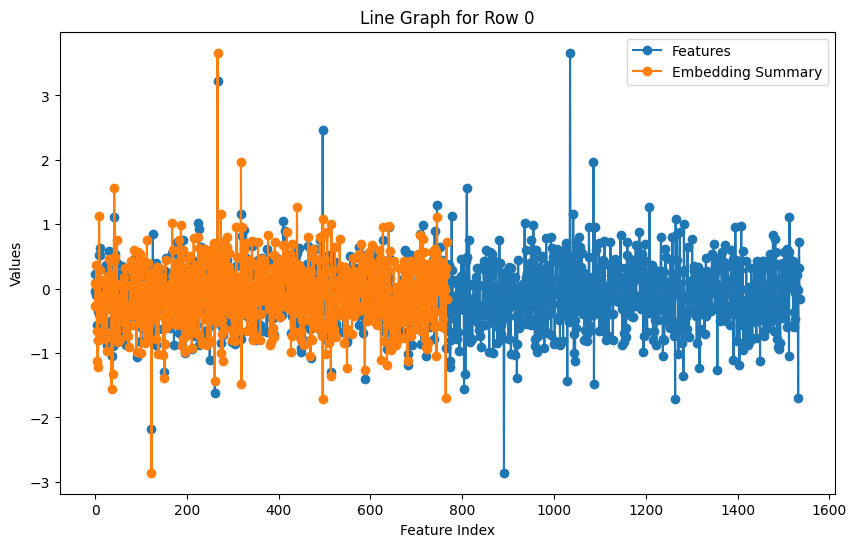

In [25]:
row_index = 0  # Change this to the row you want to visualize

# Extract the data for the specified row
feature_values = features[row_index].numpy()
embedding_values = embedding_summary[row_index].numpy()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(feature_values, label='Features', marker='o')
plt.plot(embedding_values, label='Embedding Summary', marker='o')

# Set labels and title
plt.xlabel('Feature Index')
plt.ylabel('Values')
plt.title(f'Line Graph for Row {row_index}')
plt.legend()  # Display legend

# Show the plot
plt.show()

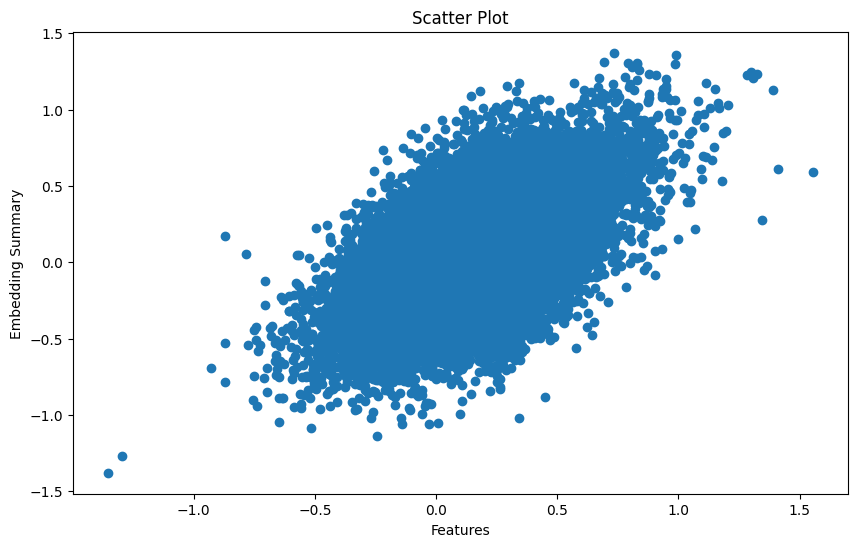

In [26]:
import matplotlib.pyplot as plt
import torch

# Assuming features and embedding_summary are your tensors
x_values = features[:, 0].numpy()  # Assuming you want to use the first feature for x-axis
y_values = embedding_summary[:, 0].numpy()  # Assuming you want to use the first feature for y-axis

plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values)
plt.xlabel('Features')
plt.ylabel('Embedding Summary')
plt.title('Scatter Plot')
plt.show()

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming features and embedding_summary are your tensors
# Assuming you want to predict the first element of embedding_summary based on all features

# Select the target variable (embedding_summary) and features
target_variable = embedding_summary[:, 0].view(-1, 1)  # Assuming you want to predict the first element
input_features = features

# Convert features and target_variable to torch tensors if they are not already
input_features = torch.tensor(input_features, dtype=torch.float32)
target_variable = torch.tensor(target_variable, dtype=torch.float32)

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = input_features.shape[1]
output_size = 1  # Assuming you want to predict a single value
model = LinearRegressionModel(input_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Adjust the learning rate

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(input_features)
    loss = criterion(outputs, target_variable)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Now the model is trained, and you can use it for predictions
# For example, predict the first element of embedding_summary for the first row of features
with torch.no_grad():
    predicted_value = model(input_features[0])
    print(f'Predicted Value: {predicted_value.item()}')

C:\Users\LG\AppData\Local\Temp\ipykernel_12440\2363407909.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_features = torch.tensor(input_features, dtype=torch.float32)
C:\Users\LG\AppData\Local\Temp\ipykernel_12440\2363407909.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_variable = torch.tensor(target_variable, dtype=torch.float32)


Epoch [100/1000], Loss: 0.08137518167495728
Epoch [200/1000], Loss: 0.06962376832962036
Epoch [300/1000], Loss: 0.062014952301979065
Epoch [400/1000], Loss: 0.05625328794121742
Epoch [500/1000], Loss: 0.05166013166308403
Epoch [600/1000], Loss: 0.047884657979011536
Epoch [700/1000], Loss: 0.04471053183078766
Epoch [800/1000], Loss: 0.04199439287185669
Epoch [900/1000], Loss: 0.039636701345443726
Epoch [1000/1000], Loss: 0.037565767765045166
Predicted Value: -0.15031616389751434


C:\Users\LG\AppData\Local\Temp\ipykernel_12440\880690012.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_features = torch.tensor(input_features, dtype=torch.float32)
C:\Users\LG\AppData\Local\Temp\ipykernel_12440\880690012.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_variable = torch.tensor(target_variable, dtype=torch.float32)


Epoch [100/1000], Loss: 0.07530515640974045
Epoch [200/1000], Loss: 0.06486471742391586
Epoch [300/1000], Loss: 0.057867880910634995
Epoch [400/1000], Loss: 0.052658941596746445
Epoch [500/1000], Loss: 0.048535749316215515
Epoch [600/1000], Loss: 0.04514048621058464
Epoch [700/1000], Loss: 0.042268212884664536
Epoch [800/1000], Loss: 0.03979094326496124
Epoch [900/1000], Loss: 0.03762323036789894
Epoch [1000/1000], Loss: 0.03570493683218956


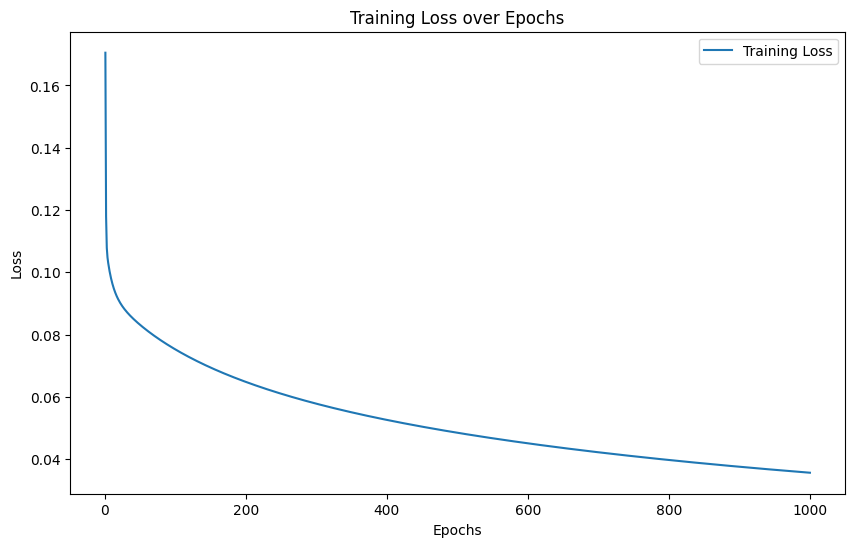

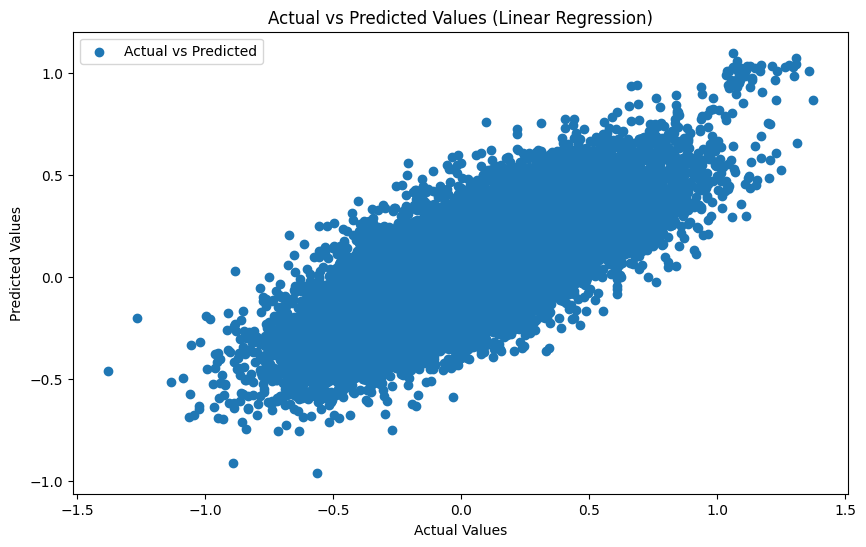

In [30]:
# Assuming features and embedding_summary are your tensors
# Assuming you want to predict the first element of embedding_summary based on all features

# Select the target variable (embedding_summary) and features
target_variable = embedding_summary[:, 0].view(-1, 1)  # Assuming you want to predict the first element
input_features = features

# Convert features and target_variable to torch tensors if they are not already
input_features = torch.tensor(input_features, dtype=torch.float32)
target_variable = torch.tensor(target_variable, dtype=torch.float32)

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

# Instantiate the model
input_size = input_features.shape[1]
output_size = 1  # Assuming you want to predict a single value
model = LinearRegressionModel(input_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Adjust the learning rate

# Lists to store losses for visualization
losses = []

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(input_features)
    loss = criterion(outputs, target_variable)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Append the current loss for visualization
    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Plotting the losses over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Now the model is trained, and you can use it for predictions
# For example, predict the first element of embedding_summary for all rows of features
with torch.no_grad():
    predicted_values = model(input_features).numpy()

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(target_variable.numpy(), predicted_values, label='Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.show()

C:\Users\LG\anaconda3_2\envs\daegu\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 9.373886260502044e-06


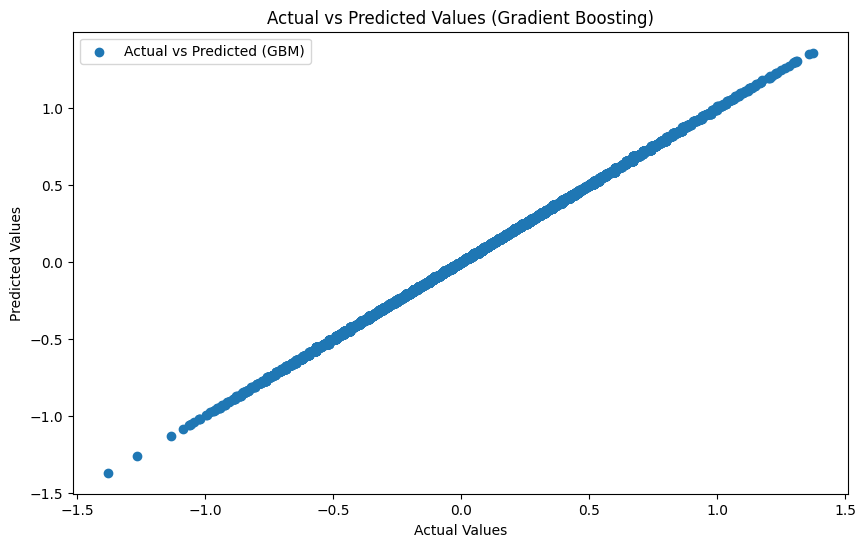

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming features and embedding_summary are your arrays
# Assuming you want to predict the first element of embedding_summary based on all features

# Select the target variable (embedding_summary) and features
target_variable = embedding_summary[:, 0]
input_features = features

# Instantiate the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Reshape the target variable if needed
target_variable = target_variable.reshape(-1, 1)

# Fit the model
gbm_model.fit(input_features, target_variable)

# Predict the target variable
predicted_values = gbm_model.predict(input_features)

# Model evaluation
mse = mean_squared_error(target_variable, predicted_values)
print(f'Mean Squared Error: {mse}')

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(target_variable.numpy(), predicted_values, label='Actual vs Predicted (GBM)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.legend()
plt.show()

In [37]:
features_new_text.shape

torch.Size([1, 110, 768])

In [39]:
downstream_model.coef_.shape[1]

1536

In [36]:
import torch
from sklearn.linear_model import LinearRegression

# Assuming you have the linear regression model trained
# downstream_model = LinearRegression()
# (You should train this model with your actual data before using it)

# Assuming 'new_text' is the new text you want to summarize
new_text = """고 최고위원은 23일 라디오 '김종배의 시선집중'에서 "(당 사무총장의 사과에) 충분하지 않다는 반응들이 많았고 그런 거라면 공당으로서는 마땅한 수준의 무엇인가를 하지 않을 수 없는 상황이었다"고 밝혔다.

이어 "개인적으로는 워낙 좋아하는 선배고 청와대에서 같이 일하기도 했던 사이라서 결정하는 게 정말 괴롭긴 했지만, 그래도 국민들 앞에서 온정주의로부터 벗어나가겠다고 약속한 바가 있었기 때문에 최대한 거기에 맞춰서 가야 되는 게 민주당이 해야 될 일"이라며 "어렵지만 그렇게 결정했다"고 말했다.""" # Replace with your actual new text

# Tokenize and encode the new text
encoded_new_text = tokenizer(new_text, padding=True, truncation=True, return_tensors='pt')

# Forward pass through KoBERT model
with torch.no_grad():
    output_new_text = model(encoded_new_text['input_ids'], attention_mask=encoded_new_text['attention_mask']).last_hidden_state

# Concatenate KoBERT embeddings
features_new_text = torch.cat([output_new_text], dim=1)

# Use the downstream model for prediction
prediction_new_text = downstream_model.predict(features_new_text.numpy().reshape(1, -1))

# Decode the prediction to get a summary
# Your decoding logic here (e.g., using a threshold or a more complex decoding strategy)
decoded_summary_new_text = your_decoding_logic(prediction_new_text)

# Print the predicted summary
print("Predicted Summary for New Text:", decoded_summary_new_text) 

ValueError: X has 84480 features, but LinearRegression is expecting 1536 features as input.

In [52]:
new_text_body = "나는 바보다"

In [53]:
# New text
new_text_body = """최강욱 전 더불어민주당 의원이 '설치는 암컷' 발언으로 당원자격 6개월 정지 징계를 받은 가운데 고민정 민주당 최고위원이 "민주당이 해야될 일"이라고 언급했다.

고 최고위원은 23일 라디오 '김종배의 시선집중'에서 "(당 사무총장의 사과에) 충분하지 않다는 반응들이 많았고 그런 거라면 공당으로서는 마땅한 수준의 무엇인가를 하지 않을 수 없는 상황이었다"고 밝혔다.

이어 "개인적으로는 워낙 좋아하는 선배고 청와대에서 같이 일하기도 했던 사이라서 결정하는 게 정말 괴롭긴 했지만, 그래도 국민들 앞에서 온정주의로부터 벗어나가겠다고 약속한 바가 있었기 때문에 최대한 거기에 맞춰서 가야 되는 게 민주당이 해야 될 일"이라며 "어렵지만 그렇게 결정했다"고 말했다.

앞서 최 전 의원은 지난 19일 광주과학기술원에서 열린 민형배 민주당 의원의 책 '탈당의 정치' 출판기념회에 참석했다. 이 자리에서 최 전 의원은 윤석열 정부를 '설치는 암컷'에 비유해 여성 비하 논란을 빚었다. 당시 그는 "(조지 오웰 소설) '동물농장'에도 보면 그렇게 암컷들이 나와서 설치고 이러는 거는 잘 없다"고 말했다.

현장에서 최 전 의원은 "암컷을 비하하는 말씀이 아니고 설치는 암컷을 암컷이라고 부르는 것일 뿐"이라고 해명했지만 질타가 쏟아졌다.

이에 민주당은 당 윤리심판원을 거치지 않고 최고위 의결로 최 전 의원에게 당원자격 6개월 정지 징계를 내렸다."""

# Tokenize and encode new text
encoded_new_text_body = tokenizer(new_text_body, padding=True, truncation=True, return_tensors='pt')

# Forward pass through KoBERT model
with torch.no_grad():
    output_new_text_body = model(encoded_new_text_body['input_ids'], attention_mask=encoded_new_text_body['attention_mask']).last_hidden_state

# 예측을 위해 다운스트림 모델 사용
prediction_new_text = downstream_model.predict(np.concatenate([output_new_text_body.mean(dim=1).numpy().reshape(1, -1), np.zeros((1, 768))], axis=1))

print(f'새로운 텍스트에 대한 예측된 요약: {prediction_new_text}')

새로운 텍스트에 대한 예측된 요약: [[-0.08605509 -0.08376321 -0.08407191 -0.08754927 -0.08552171 -0.08723899
  -0.07801968 -0.08471493 -0.08489574 -0.08231719 -0.08263185 -0.09268087
  -0.08376137 -0.09136641 -0.08528184 -0.08183703 -0.08475681 -0.07775244
  -0.08083958 -0.08515354 -0.07724949 -0.08333648 -0.08600737 -0.08680116
  -0.0822316  -0.08480079 -0.09057995 -0.08234705 -0.08619502 -0.08332885
  -0.08253636 -0.08513556 -0.08348974 -0.08260606 -0.08394788 -0.08190487
  -0.09109652 -0.08845703 -0.07835481 -0.08233345 -0.08305295 -0.08239881
  -0.08184273 -0.08556732 -0.08507014 -0.07298746 -0.07825987 -0.08351761
  -0.08245263 -0.08461321 -0.08724934 -0.08814571 -0.08354255 -0.08581537
  -0.08317357 -0.08127877 -0.08332043 -0.08465279 -0.08779506 -0.08132413
  -0.0797916  -0.07688969 -0.07392606 -0.07378567 -0.08739713 -0.08279194
  -0.08237139 -0.08478401 -0.0812471  -0.09177178 -0.08733236 -0.084276
  -0.08507267 -0.08470672 -0.08903499 -0.07710228 -0.07726793 -0.08059334
  -0.07983381 -0.087

In [57]:
# Assuming tokenizer is the same one used for training
tokenizer = BertTokenizer.from_pretrained("kykim/bert-kor-base")

# Assuming your numerical prediction is stored in the variable 'prediction_new_text'
# Adjust the threshold based on your needs
threshold = 0.5
binary_predictions = (prediction_new_text > threshold).astype(int)

# Convert binary predictions to Korean text using the tokenizer
decoded_summary_new_text = tokenizer.decode(binary_predictions[0], skip_special_tokens=True)

print(f'Decoded summary for new text: {decoded_summary_new_text}')

Decoded summary for new text: 


In [60]:
new_text = "Your new text goes here"
encoded_new_text = tokenizer(new_text, padding=True, truncation=True, return_tensors='pt')

with torch.no_grad():
    output_new_text = model(encoded_new_text['input_ids'], attention_mask=encoded_new_text['attention_mask']).last_hidden_state

prediction_new_text = downstream_model.predict(torch.cat([output_new_text.mean(dim=1), torch.zeros(1, 768)], dim=1).numpy())
print(f'Predicted label for new text: {prediction_new_text}')

Predicted label for new text: [[-0.08604661 -0.08377969 -0.08407702 -0.08749226 -0.08551373 -0.08724612
  -0.07798949 -0.08473116 -0.08489054 -0.08230036 -0.0826261  -0.0926674
  -0.08375866 -0.09139071 -0.08525762 -0.08184105 -0.08474249 -0.0777835
  -0.08083953 -0.08515884 -0.07722476 -0.08331926 -0.08599953 -0.08680683
  -0.08224519 -0.08483674 -0.09056    -0.08234392 -0.08618645 -0.08331169
  -0.08253928 -0.08513665 -0.08349673 -0.08264183 -0.08393368 -0.08192569
  -0.09107804 -0.08845708 -0.07835831 -0.0823385  -0.08303554 -0.08241144
  -0.08184986 -0.08559088 -0.08504841 -0.07299558 -0.07826369 -0.08352273
  -0.08245771 -0.0846327  -0.08726005 -0.08813296 -0.08356646 -0.08581593
  -0.08316161 -0.08131301 -0.08335094 -0.08465879 -0.08779582 -0.08129449
  -0.0798029  -0.07689761 -0.07392237 -0.07381061 -0.08740708 -0.08274142
  -0.08235718 -0.08475858 -0.08126898 -0.09175971 -0.08733094 -0.08427146
  -0.08506169 -0.08472414 -0.08905397 -0.0771009  -0.07724217 -0.08057699
  -0.07982

In [63]:
from transformers import BertTokenizer

# Assuming 'tokenizer' is the BERT tokenizer used during training
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Replace 'prediction_new_text' with the actual nested list of numeric values you want to decode
flat_prediction = [item for sublist in prediction_new_text for item in sublist]

decoded_text = tokenizer.decode(flat_prediction, skip_special_tokens=True)

print(decoded_text)

In [68]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Save the model and tokenizer
model.save_pretrained('bert_model')
tokenizer.save_pretrained('tokenizer_model')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


('tokenizer_model\\tokenizer_config.json',
 'tokenizer_model\\special_tokens_map.json',
 'tokenizer_model\\vocab.txt',
 'tokenizer_model\\added_tokens.json')

In [75]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('tokenizer_model')
model = BertForSequenceClassification.from_pretrained('bert_model')  # Replace 'your_model_path' with the path to your trained model

# Replace 'original_text' with the actual text you want to summarize
original_text = """최강욱 전 더불어민주당 의원이 '설치는 암컷' 발언으로 당원자격 6개월 정지 징계를 받은 가운데 고민정 민주당 최고위원이 "민주당이 해야될 일"이라고 언급했다.

고 최고위원은 23일 라디오 '김종배의 시선집중'에서 "(당 사무총장의 사과에) 충분하지 않다는 반응들이 많았고 그런 거라면 공당으로서는 마땅한 수준의 무엇인가를 하지 않을 수 없는 상황이었다"고 밝혔다.

이어 "개인적으로는 워낙 좋아하는 선배고 청와대에서 같이 일하기도 했던 사이라서 결정하는 게 정말 괴롭긴 했지만, 그래도 국민들 앞에서 온정주의로부터 벗어나가겠다고 약속한 바가 있었기 때문에 최대한 거기에 맞춰서 가야 되는 게 민주당이 해야 될 일"이라며 "어렵지만 그렇게 결정했다"고 말했다.

앞서 최 전 의원은 지난 19일 광주과학기술원에서 열린 민형배 민주당 의원의 책 '탈당의 정치' 출판기념회에 참석했다. 이 자리에서 최 전 의원은 윤석열 정부를 '설치는 암컷'에 비유해 여성 비하 논란을 빚었다. 당시 그는 "(조지 오웰 소설) '동물농장'에도 보면 그렇게 암컷들이 나와서 설치고 이러는 거는 잘 없다"고 말했다.

현장에서 최 전 의원은 "암컷을 비하하는 말씀이 아니고 설치는 암컷을 암컷이라고 부르는 것일 뿐"이라고 해명했지만 질타가 쏟아졌다.

이에 민주당은 당 윤리심판원을 거치지 않고 최고위 의결로 최 전 의원에게 당원자격 6개월 정지 징계를 내렸다."""

# Tokenize the input text
inputs = tokenizer(original_text, return_tensors="pt", max_length=512, truncation=True)

# Get the model output
with torch.no_grad():
    logits = model(**inputs).logits

# Use the tokenizer to decode the predicted token IDs
decoded_text = tokenizer.decode(logits[0], skip_special_tokens=True)

print(decoded_text)

In [76]:
decoded_text

''

## SVR

In [123]:
from sklearn.svm import SVR

# Train downstream model (Support Vector Machine)
downstream_model_svm = SVR()
downstream_model_svm.fit(train_features, train_labels)

# Perform predictions on the test set
predictions_svm = downstream_model_svm.predict(test_features)

# Model evaluation
mse_svm = mean_squared_error(test_labels, predictions_svm)
print(f'Mean Squared Error (SVM): {mse_svm}')

ValueError: y should be a 1d array, got an array of shape (31956, 768) instead.

## 랜덤포레스트

In [124]:
from sklearn.ensemble import RandomForestRegressor

# Train downstream model (Random Forest)
downstream_model_rf = RandomForestRegressor()
downstream_model_rf.fit(train_features, train_labels)

# Perform predictions on the test set
predictions_rf = downstream_model_rf.predict(test_features)

# Model evaluation
mse_rf = mean_squared_error(test_labels, predictions_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

MemoryError: could not allocate 402653184 bytes

## Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

# Train downstream model (Gradient Boosting)
downstream_model_gb = GradientBoostingRegressor()
downstream_model_gb.fit(train_features, train_labels)

# Perform predictions on the test set
predictions_gb = downstream_model_gb.predict(test_features)

# Model evaluation
mse_gb = mean_squared_error(test_labels, predictions_gb)
print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')

ValueError: y should be a 1d array, got an array of shape (31956, 768) instead.